# Import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from lightgbm import LGBMRegressor

#import lightgbm as lgb

from lightgbm import plot_importance 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# Data Import
1. iszero
2. nozero
3. nf (new feature)
---
- input featrue = 27
- 7일간 data를 하나의 instance화 한다면 -> input matrix 7 x 26 -> ouput matrix 7 x 1 (가격만 출력)
- 2148 row x 26 columns
- 다변량 시계열(multiivariate time series) 예측 system
- In our cousre DA, design for 단변량 시계열(univariate time series) prediction
- 2014.01.01~2020.12.31 data
- 건고추는 2014.01.22부터, 나머지는 대부분 2014.01.02부터

In [14]:
path = "./Dataset/"
price_tag = ['건고추가격', '대파가격', '마늘가격', '무가격', '배추가격']
crops_en = ['peppers', 'green_onion', 'garlic', 'radish', 'cabbage']

# is zero
isZero = pd.read_csv(path+"da_data.csv")

# no zero 
noZero = pd.read_csv(path+"da_data_nozero.csv")

# new features 
nf_peppers = pd.read_csv(path+"last건고추.csv")
nf_green_onion = pd.read_csv(path+"last대파.csv")
nf_garlic = pd.read_csv(path+"last마늘.csv")
nf_radish = pd.read_csv(path+"last무.csv")
nf_cabbage = pd.read_csv(path+"last배추.csv")

original_data_list = [nf_peppers, nf_green_onion, nf_garlic, nf_radish, nf_cabbage]

In [15]:
X_column_pepper = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '건고추거래량', '건고추생산량', '건고추저장이월량', '건고추수입량', '건고추수입금액',
       '건고추재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_pepper = ['건고추가격']

X_column_green_onion = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '대파거래량', '대파생산량', '대파저장이월량', '대파수입량', '대파수입금액',
       '대파재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_green_onion = ['대파가격']

X_column_garlic = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '마늘거래량', '마늘생산량', '마늘저장이월량', '마늘수입량', '마늘수입금액',
       '마늘재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_garlic = ['마늘가격']

X_column_radish = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '무거래량', '무생산량', '무저장이월량', '무수입량', '무수입금액',
       '무재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_radish = ['무가격']

X_column_cabbage = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '배추거래량', '배추생산량', '배추저장이월량', '배추수입량', '배추수입금액',
       '배추재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_cabbage = ['배추가격']

X_column_list = [X_column_pepper, X_column_green_onion, X_column_garlic, X_column_radish, X_column_cabbage]
y_column_list = [y_column_pepper, y_column_green_onion, y_column_garlic, y_column_radish, y_column_cabbage] # oh...is same thing with p-tag...

# 함수화

In [40]:
def pre_processing(data) :
    scaler = MinMaxScaler()
    scale_cols = data.iloc[:,2:].columns
    
    data.sort_index(ascending=False).reset_index(drop=True)
    
    scaled = scaler.fit_transform(data[scale_cols])
    scaled = pd.DataFrame(scaled)
    scaled.columns = scale_cols
    
    return scaled


def get_data_split(data, X_column, y_column) :
    train_X, test_X, train_y, test_y = train_test_split(
    data[X_column], 
    data[y_column],
    test_size=0.2,
    shuffle=True,   # random split 
    random_state=42) # seed 고정, same sampling 
    print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)
    
    return train_X, test_X, train_y, test_y


def get_model_cv_prediction(model, X_data, y_label) :
    neg_mse_scores = cross_val_score(model, X_data, y_label, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


def gridsearchCV (model, parameters, X_train, y_train) :
    grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=2) # cv is fold num
    grid.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid.best_score_))
    print('GridSearchCV 최적 하이퍼 파라미터로 학습된 Esimator 반환')
    
    return grid.best_estimator_


def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)


def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

# Preproecssing 

input_data_list -> 0:건고추, 1:대파, 2:마늘, 3:무, 4:배추

In [17]:
input_data_list = []
for d in original_data_list : 
    processed = pre_processing(d)
    input_data_list.append(processed)

# Modeling 
1. model_xgb_1 : 파이썬 래퍼 클래스
2. model_xgb_2 : 사이킷런 래퍼 클래스 -> 사이킷런 기반 Estimator를 상속받아 작성됨  


In [18]:
input_data = pre_processing(input_data_list[0])
 
train_X, test_X, train_y, test_y = get_data_split(input_data_list[0], X_column_list[0], y_column_list[0])

(1768, 26) (443, 26) (1768, 1) (443, 1)


In [19]:
dtrain = xgb.DMatrix(data=train_X, label=train_y)
dtest = xgb.DMatrix(data=test_X, label=test_y)
wlist = [(dtrain, 'train'), (dtest,'eval')]

In [48]:
params = { 
    'max_depth':3,
    'eta':0.1,
    'objective':'reg:linear',
    'eval_metric':'logloss',
    'early_stoppings':100
}
evals = [(test_X, test_y)]

model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.001)
model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_metric="logloss",
               eval_set=evals, verbose=True)

C:\Users\Hyeongbin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Hyeongbin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.00205071
[2]	valid_0's l2: 0.00204931
[3]	valid_0's l2: 0.00204795
[4]	valid_0's l2: 0.00204656
[5]	valid_0's l2: 0.00204521
[6]	valid_0's l2: 0.00204383
[7]	valid_0's l2: 0.00204248
[8]	valid_0's l2: 0.0020411
[9]	valid_0's l2: 0.00203976
[10]	valid_0's l2: 0.00203839
[11]	valid_0's l2: 0.00203703
[12]	valid_0's l2: 0.00203567
[13]	valid_0's l2: 0.00203431
[14]	valid_0's l2: 0.00203295
[15]	valid_0's l2: 0.0020316
[16]	valid_0's l2: 0.00203025
[17]	valid_0's l2: 0.0020289
[18]	valid_0's l2: 0.00202756
[19]	valid_0's l2: 0.00202622
[20]	valid_0's l2: 0.00202488
[21]	valid_0's l2: 0.00202354
[22]	valid_0's l2: 0.00202221
[23]	valid_0's l2: 0.00202088
[24]	valid_0's l2: 0.00201955
[25]	valid_0's l2: 0.00201822
[26]	valid_0's l2: 0.00201691
[27]	valid_0's l2: 0.00201558
[28]	valid_0's l2: 0.00201426
[29]	valid_0's l2: 0.00201293
[30]	valid_0's l2: 0.00201161
[31]	valid_0's l2: 0.00201028
[32]	valid_0's l2: 0.00200896
[33]	valid_0's l2: 0.00200764
[34]	valid_0's l2: 0.0

[382]	valid_0's l2: 0.00168013
[383]	valid_0's l2: 0.00167952
[384]	valid_0's l2: 0.0016788
[385]	valid_0's l2: 0.00167813
[386]	valid_0's l2: 0.00167747
[387]	valid_0's l2: 0.0016768
[388]	valid_0's l2: 0.00167611
[389]	valid_0's l2: 0.00167545
[390]	valid_0's l2: 0.0016748
[391]	valid_0's l2: 0.00167414
[392]	valid_0's l2: 0.00167347
[393]	valid_0's l2: 0.00167285
[394]	valid_0's l2: 0.00167213
[395]	valid_0's l2: 0.0016715
[396]	valid_0's l2: 0.00167083
[397]	valid_0's l2: 0.00167019
[398]	valid_0's l2: 0.00166955
[399]	valid_0's l2: 0.00166892
[400]	valid_0's l2: 0.00166832
[401]	valid_0's l2: 0.00166763
[402]	valid_0's l2: 0.00166704
[403]	valid_0's l2: 0.00166644
[404]	valid_0's l2: 0.00166575
[405]	valid_0's l2: 0.00166507
[406]	valid_0's l2: 0.00166436
[407]	valid_0's l2: 0.00166375
[408]	valid_0's l2: 0.00166308
[409]	valid_0's l2: 0.00166238
[410]	valid_0's l2: 0.00166181
[411]	valid_0's l2: 0.00166112
[412]	valid_0's l2: 0.00166045
[413]	valid_0's l2: 0.0016599
[414]	valid_0

[804]	valid_0's l2: 0.00147568
[805]	valid_0's l2: 0.0014754
[806]	valid_0's l2: 0.00147509
[807]	valid_0's l2: 0.00147479
[808]	valid_0's l2: 0.00147451
[809]	valid_0's l2: 0.00147423
[810]	valid_0's l2: 0.00147392
[811]	valid_0's l2: 0.00147364
[812]	valid_0's l2: 0.00147336
[813]	valid_0's l2: 0.00147309
[814]	valid_0's l2: 0.00147281
[815]	valid_0's l2: 0.00147252
[816]	valid_0's l2: 0.00147224
[817]	valid_0's l2: 0.00147196
[818]	valid_0's l2: 0.00147168
[819]	valid_0's l2: 0.00147142
[820]	valid_0's l2: 0.00147114
[821]	valid_0's l2: 0.00147089
[822]	valid_0's l2: 0.0014706
[823]	valid_0's l2: 0.00147034
[824]	valid_0's l2: 0.00147004
[825]	valid_0's l2: 0.00146979
[826]	valid_0's l2: 0.00146954
[827]	valid_0's l2: 0.00146929
[828]	valid_0's l2: 0.00146902
[829]	valid_0's l2: 0.00146875
[830]	valid_0's l2: 0.0014685
[831]	valid_0's l2: 0.0014682
[832]	valid_0's l2: 0.00146794
[833]	valid_0's l2: 0.00146768
[834]	valid_0's l2: 0.0014674
[835]	valid_0's l2: 0.00146715
[836]	valid_0

LGBMRegressor(learning_rate=0.001, n_estimators=1000)

In [26]:
pred_lgbm = model_lgbm.predict(test_X)

# 평가 지표 및 해석

In [28]:
# rmse for model_1 
mse = mean_squared_error(test_y, pred_lgbm)
print("mse01: %f" % mse)

rmse = np.sqrt(mse)
print("rmse : %f" %rmse)

mse01: 0.001242
rmse : 0.035243


In [41]:
get_model_cv_prediction(model_lgbm, train_X, train_y)

#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 0.040


In [29]:
true_y = test_y.to_numpy()
true_y = np.ravel(true_y)

df_result = pd.DataFrame(list(zip(true_y, pred_lgbm)), columns=['true_y', 'lgbm_pred'])
df_result

,true_y,lgbm_pred
0,0.017550,0.041370
1,0.024152,0.060449
2,0.126125,0.102444
3,0.062242,0.057050
4,0.068138,0.057495
...,...,...
438,0.037762,0.057385
439,0.073004,0.054725
440,0.021358,0.036187
441,0.043021,0.039267


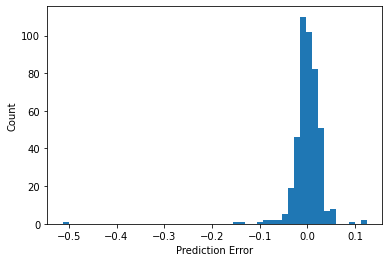

In [30]:
error = pred_lgbm - true_y
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

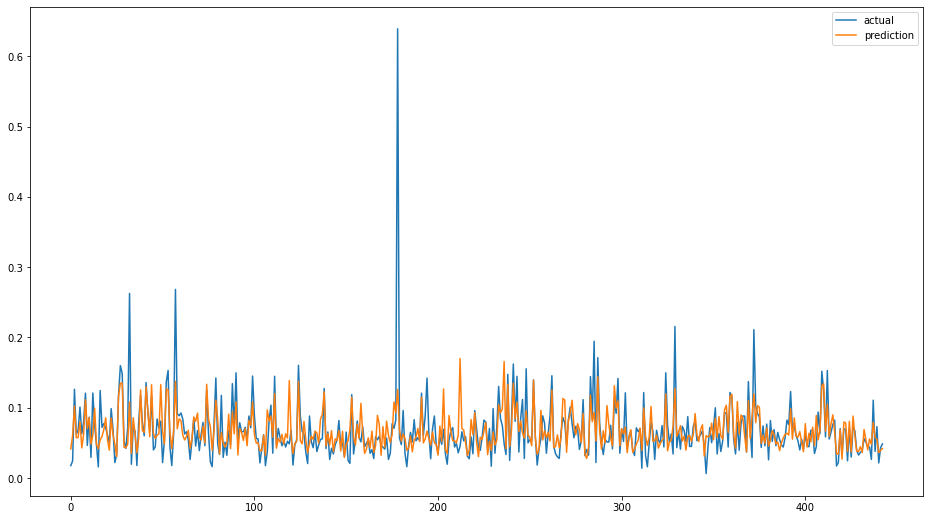

In [31]:
graph(pred_lgbm, true_y)

<AxesSubplot:>

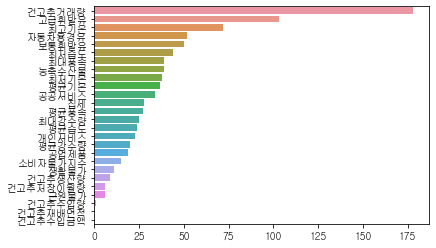

In [47]:
# 회귀 트리 Regressor 클래스는 선형 호귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다. 
# 대신 feature_importances_를 이요해 피처별 중요도를 알 수 있다. 

feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)